# Bonus: Temperature Analysis I

In [1]:
import pandas as pd
from datetime import datetime as dt

In [20]:
# "tobs" is "temperature observations"
df = pd.read_csv('Resources/hawaii_measurements.csv')
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [21]:
# Convert the date column format from string to datetime
df['date'] = df['date'].astype('datetime64')



In [23]:
# Set the date column as the DataFrame index

df.set_index('date',inplace=True)

In [24]:
# Drop the date column

df

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73
...,...,...,...
2017-08-19,USC00516128,0.09,71
2017-08-20,USC00516128,NaN,78
2017-08-21,USC00516128,0.56,76


### Compare June and December data across all years 

In [32]:
from scipy import stats

In [28]:
# Filter data for desired months
df_jun = df.filter(like='-06-',axis=0)

df_dec = df.filter(like='-12-',axis=0)

print(df_jun,df_dec)

                station  prcp  tobs
date                               
2010-06-01  USC00519397  0.00    78
2010-06-02  USC00519397  0.01    76
2010-06-03  USC00519397  0.00    78
2010-06-04  USC00519397  0.00    76
2010-06-05  USC00519397  0.00    77
...                 ...   ...   ...
2017-06-26  USC00516128  0.02    79
2017-06-27  USC00516128  0.10    74
2017-06-28  USC00516128  0.02    74
2017-06-29  USC00516128  0.04    76
2017-06-30  USC00516128  0.20    75

[1700 rows x 3 columns]                 station  prcp  tobs
date                               
2010-12-01  USC00519397  0.04    76
2010-12-03  USC00519397  0.00    74
2010-12-04  USC00519397  0.00    74
2010-12-06  USC00519397  0.00    64
2010-12-07  USC00519397  0.00    64
...                 ...   ...   ...
2016-12-27  USC00516128  0.14    71
2016-12-28  USC00516128  0.14    71
2016-12-29  USC00516128  1.03    69
2016-12-30  USC00516128  2.37    65
2016-12-31  USC00516128  0.90    65

[1517 rows x 3 columns]


In [29]:
# Identify the average temperature for June
avg_jun = df_jun['tobs'].mean()

avg_jun

74.94411764705882

In [30]:
# Identify the average temperature for December
avg_dec = df_dec['tobs'].mean()

avg_dec

71.04152933421226

In [34]:
# Create collections of temperature data

temp_jun = df_jun['tobs']
temp_dec = df_dec['tobs']

In [37]:
# Run paired t-test

stats.ttest_ind(temp_jun,temp_dec,equal_var=False)

Ttest_indResult(statistic=31.355036920962423, pvalue=4.193529835915755e-187)

### Analysis

In [38]:
import matplotlib.pyplot as plt

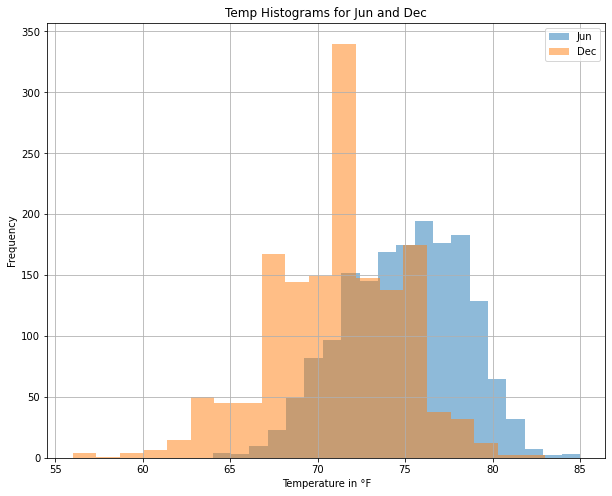

In [56]:
plt.figure(figsize=(10,8));
plt.hist(temp_jun,bins=20,alpha=0.5,label='Jun');
plt.hist(temp_dec,bins=20,alpha=0.5,label='Dec');
plt.title('Temp Histograms for Jun and Dec')
plt.xlabel(f'Temperature in \N{degree sign}F')
plt.ylabel('Frequency')
plt.legend()

plt.grid()

## Conclusion

As the pvalue is way small and giving the statistic value of 31.36, it is statistically unlikely that the observed data meets the null hypothesis, whereas these 2 groups of data are equal, or related to each other. Hence this result is statistically significant.

The paired t-test was implied as these two groups are independent to each other. In reality, the temperature of an area changes from month to month, but basically repeat the similar yearly. So an unpaired t-test could be used if studying on a typical year from all the years.

However, temperature are calculated in Fahrenheit, the difference in the average value between June and December is about 1 Celsius. This is the downside when only looking at statistical studies, it is significant different statistically but in the real world, 1 Celsius will not make you wearing more clothes...

By looking at the histograms, that in Jun, the temperature seems more steady with similar frequency but in Dec, the temperature varies more. But once again, this is in Fahrenheit and I would not worry too much about it.

Tests against other weather factors should be considered, i.e. wind speed, cloudiness etc.

I am still working on understanding about t-tests, above is only for self-references